In [49]:
import random
import numpy as np
import pandas as pd

'''
5-leg simulator
money:
$ per parlay
% ev:
'''

'\n5-leg simulator\nmoney:\n$ per parlay\n% ev:\n'

In [50]:
money = 10000 # Bankroll
ev = 5.5 # Edge
kcb_multiplier = 0.5 # Kelly criterion bet multiplier
kcb = 0.0397 # Kelly criterion optimal bet
kcb = kcb * kcb_multiplier

amount_to_bet_per_parlay = int(money*kcb) # This should be determined by inputting the EV and the bankroll into the Kelly Criterion calculator
bets = int(money / amount_to_bet_per_parlay) # The number of bets placed is the bankroll divided by the amount bet per parlay

simulations = 100000

print("The amount of bankroll is: " + str(money))
print("The number of bets placed is: " + str(bets))
print("The amount of money bet per parlay is: " + str(amount_to_bet_per_parlay))
print("The expected value is: " + str(ev))
print("The number of simulations is: " + str(simulations))


The amount of bankroll is: 10000
The number of bets placed is: 50
The amount of money bet per parlay is: 198
The expected value is: 5.5
The number of simulations is: 100000


In [51]:
profits = []

for i in range(simulations):

    profit = 0

    for i in range(bets):
        leg1 = random.randint(0,1000)
        leg2 = random.randint(0,1000)
        leg3 = random.randint(0,1000)
        leg4 = random.randint(0,1000)
        leg5 = random.randint(0,1000)

        legs = [leg1, leg2, leg3, leg4, leg5]
        kept_legs = [i for i in legs if i < ((50+ev) * 10)]

        if len(kept_legs) < 3:
            profit += -1 * amount_to_bet_per_parlay
        elif len(kept_legs) == 3:
            profit += (amount_to_bet_per_parlay * 0.4) - amount_to_bet_per_parlay
        elif len(kept_legs) == 4:
            profit += (amount_to_bet_per_parlay * 2) - amount_to_bet_per_parlay
        elif len(kept_legs) == 5:
            profit += (amount_to_bet_per_parlay * 10) - amount_to_bet_per_parlay
    
    profits.append(profit)
        

count    100000.000000
mean        804.212640
std        3113.611145
min       -7603.200000
25%       -1425.600000
50%         554.400000
75%        2772.000000
max       20354.400000
dtype: float64


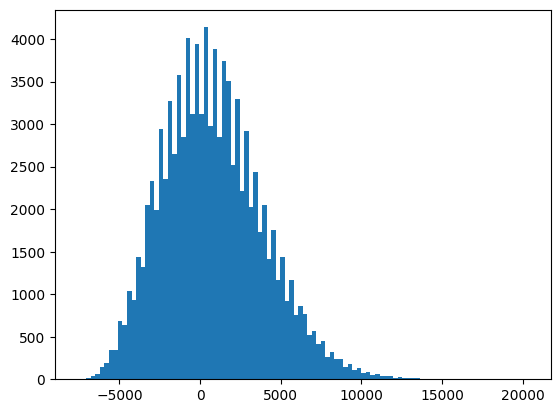

The 95% confidence interval is: $-3880.800000000001 to $6335.999999999998


In [52]:
# show 5 number summary
print(pd.Series(profits).describe())

# show distribution of profits
import matplotlib.pyplot as plt
plt.hist(profits, bins=100)
plt.show()

# get 95% interval
fifth_percentile = np.percentile(profits, 5)
ninetyfifth_percentile = np.percentile(profits, 95)
print("The 95% confidence interval is: " + "$" + str(fifth_percentile) + " to " + "$" + str(ninetyfifth_percentile))


